1) Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных Heart Disease UCI - 
https://www.kaggle.com/ronitf/heart-disease-uci
В датасете отражено наличие сердечного заболевания у пациента в зависимости от разных признаков
Датасет содержит следующие колонки:
age - возраст в годах
sex - (1 = мужчина; 0 = женщина)
cp - тип боли в груди 
trestbps - артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в стационар)
chol - холестерин в мг/дл
fbs - уровень сахара в крови натощак > 120 мг / дл) (1 = да; 0 = нет)
restecg- электрокардиографические результаты покоя
thalach - максимальная ЧСС
exang - стенокардия, вызванная физическими упражнениями (1 = да; 0 = Нет)
oldpeak - Депрессия, вызванная физическими упражнениями относительно покоя
slope - наклон пика упражнения сегмента
ca - количество крупных сосудов (0-3)
thal - 3 = нормальный; 6 = фиксированный дефект; 7 = реверзибельный дефект
target - заболевание 1-есть или 0-нет



In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [36]:
data = pd.read_csv('/Users/user/Desktop/data.csv')

In [37]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
data.shape

(303, 14)

In [39]:
total_count = data.shape[0]
print('Кол-во строк:', total_count)

Кол-во строк: 303


In [40]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [41]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [42]:
for col in data.columns:
    print('{} - {}'.format(col,data[data[col].isnull()].shape[0]))

age - 0
sex - 0
cp - 0
trestbps - 0
chol - 0
fbs - 0
restecg - 0
thalach - 0
exang - 0
oldpeak - 0
slope - 0
ca - 0
thal - 0
target - 0


In [43]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [50]:
# Уникальные значения для целевого признака
data['target'].unique()

array([1, 0])

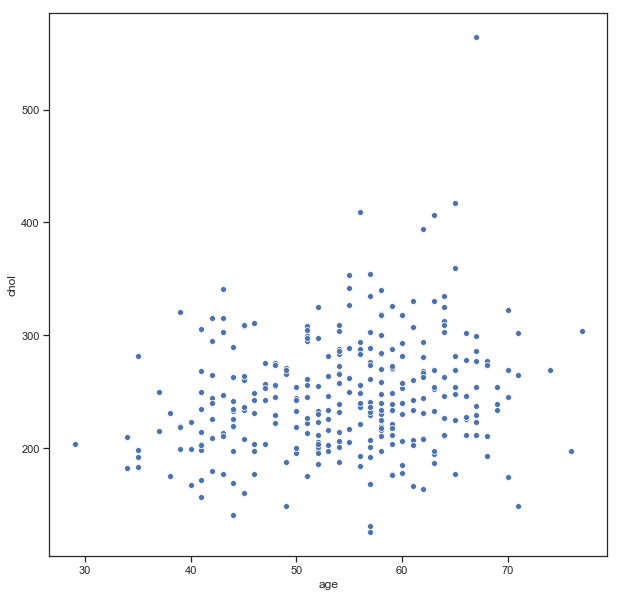

In [49]:
# Зависимисоть между возрастом пациаента и содержанием холестирина в крови
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='age', y='chol', data=data)

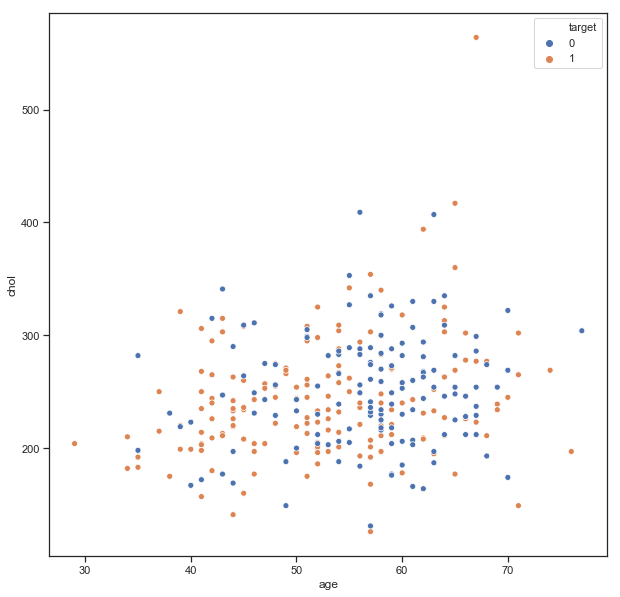

In [54]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='age', y='chol', data=data, hue='target')

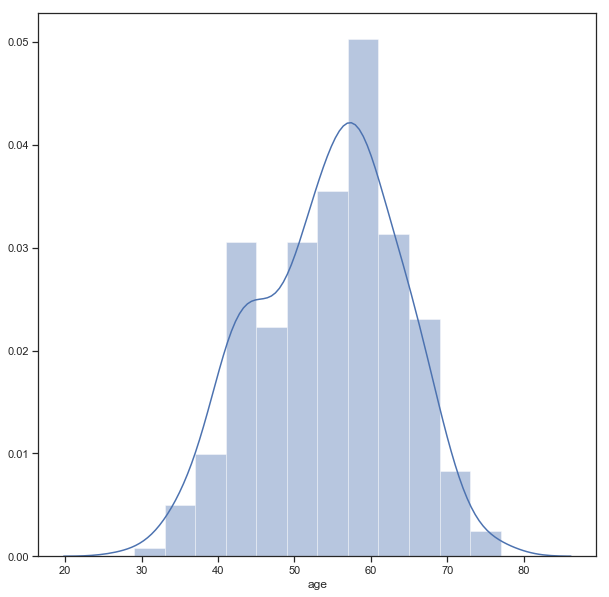

In [57]:
#Построение гистограммы
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['age'])

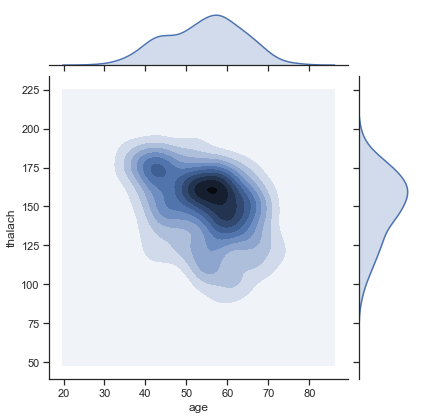

In [58]:
#joinplot
sns.jointplot(x='age', y='thalach', data=data, kind="kde")

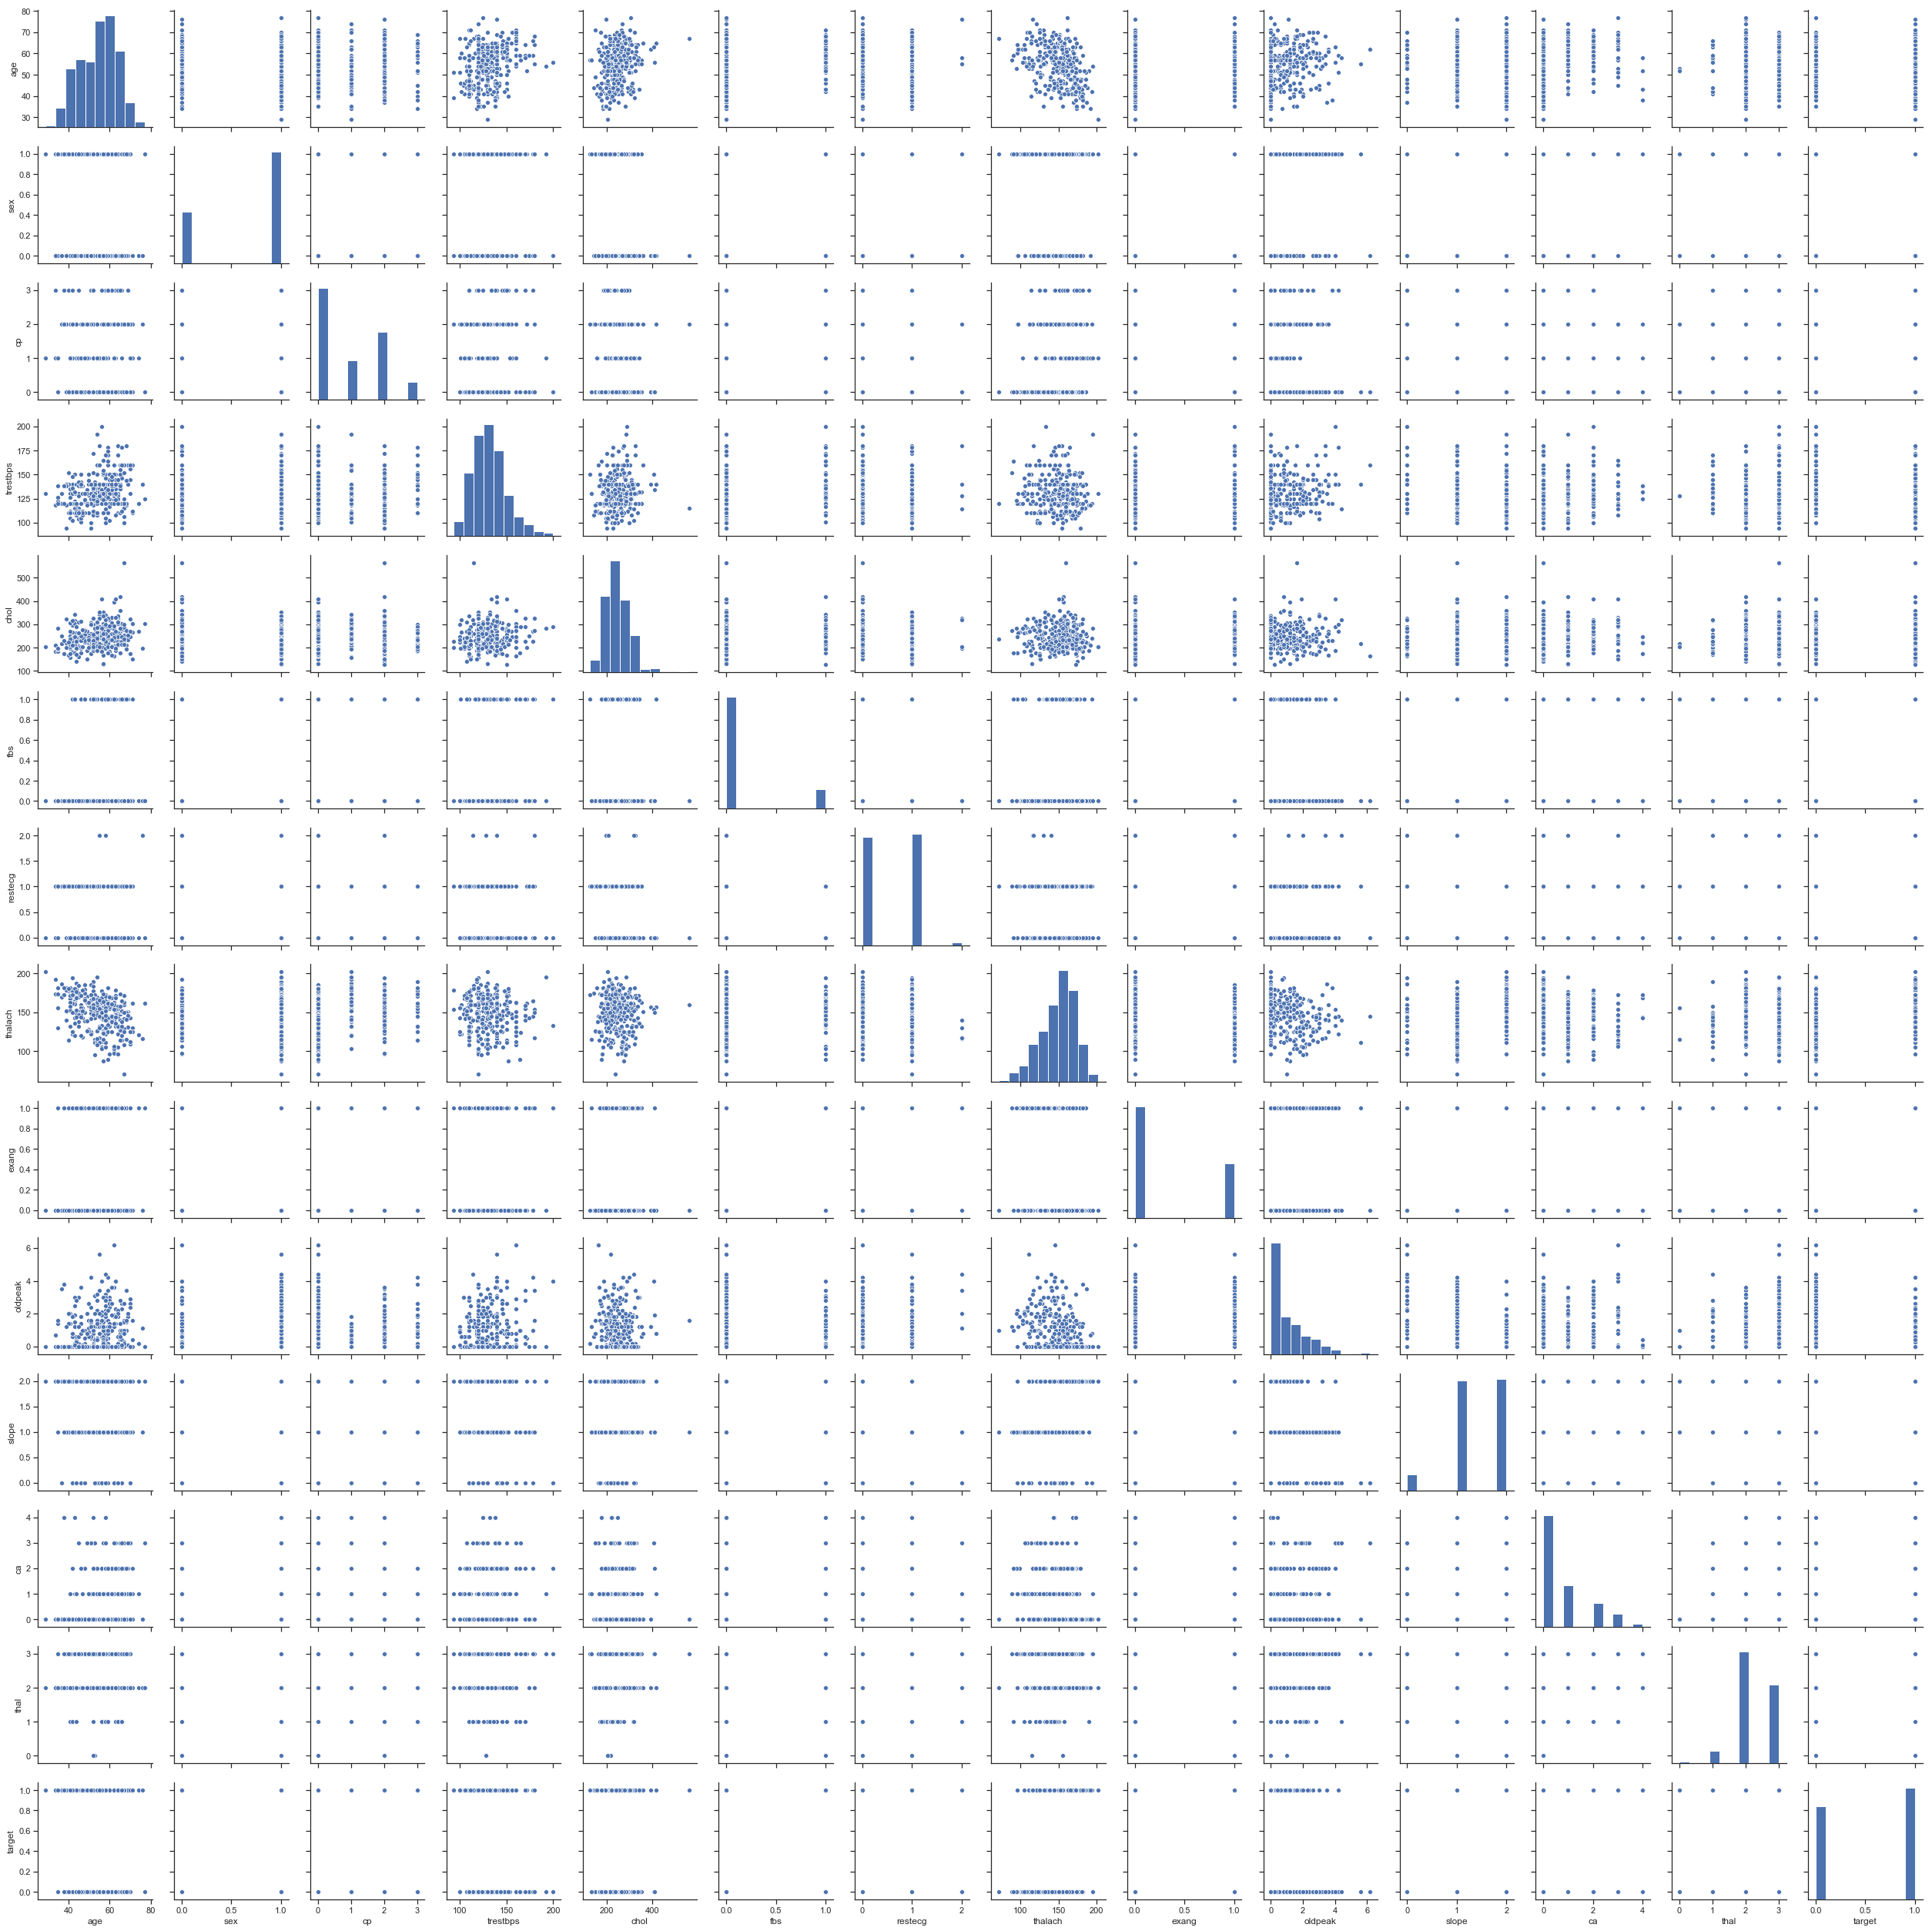

In [59]:
#парные диаграммы
sns.pairplot(data)

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


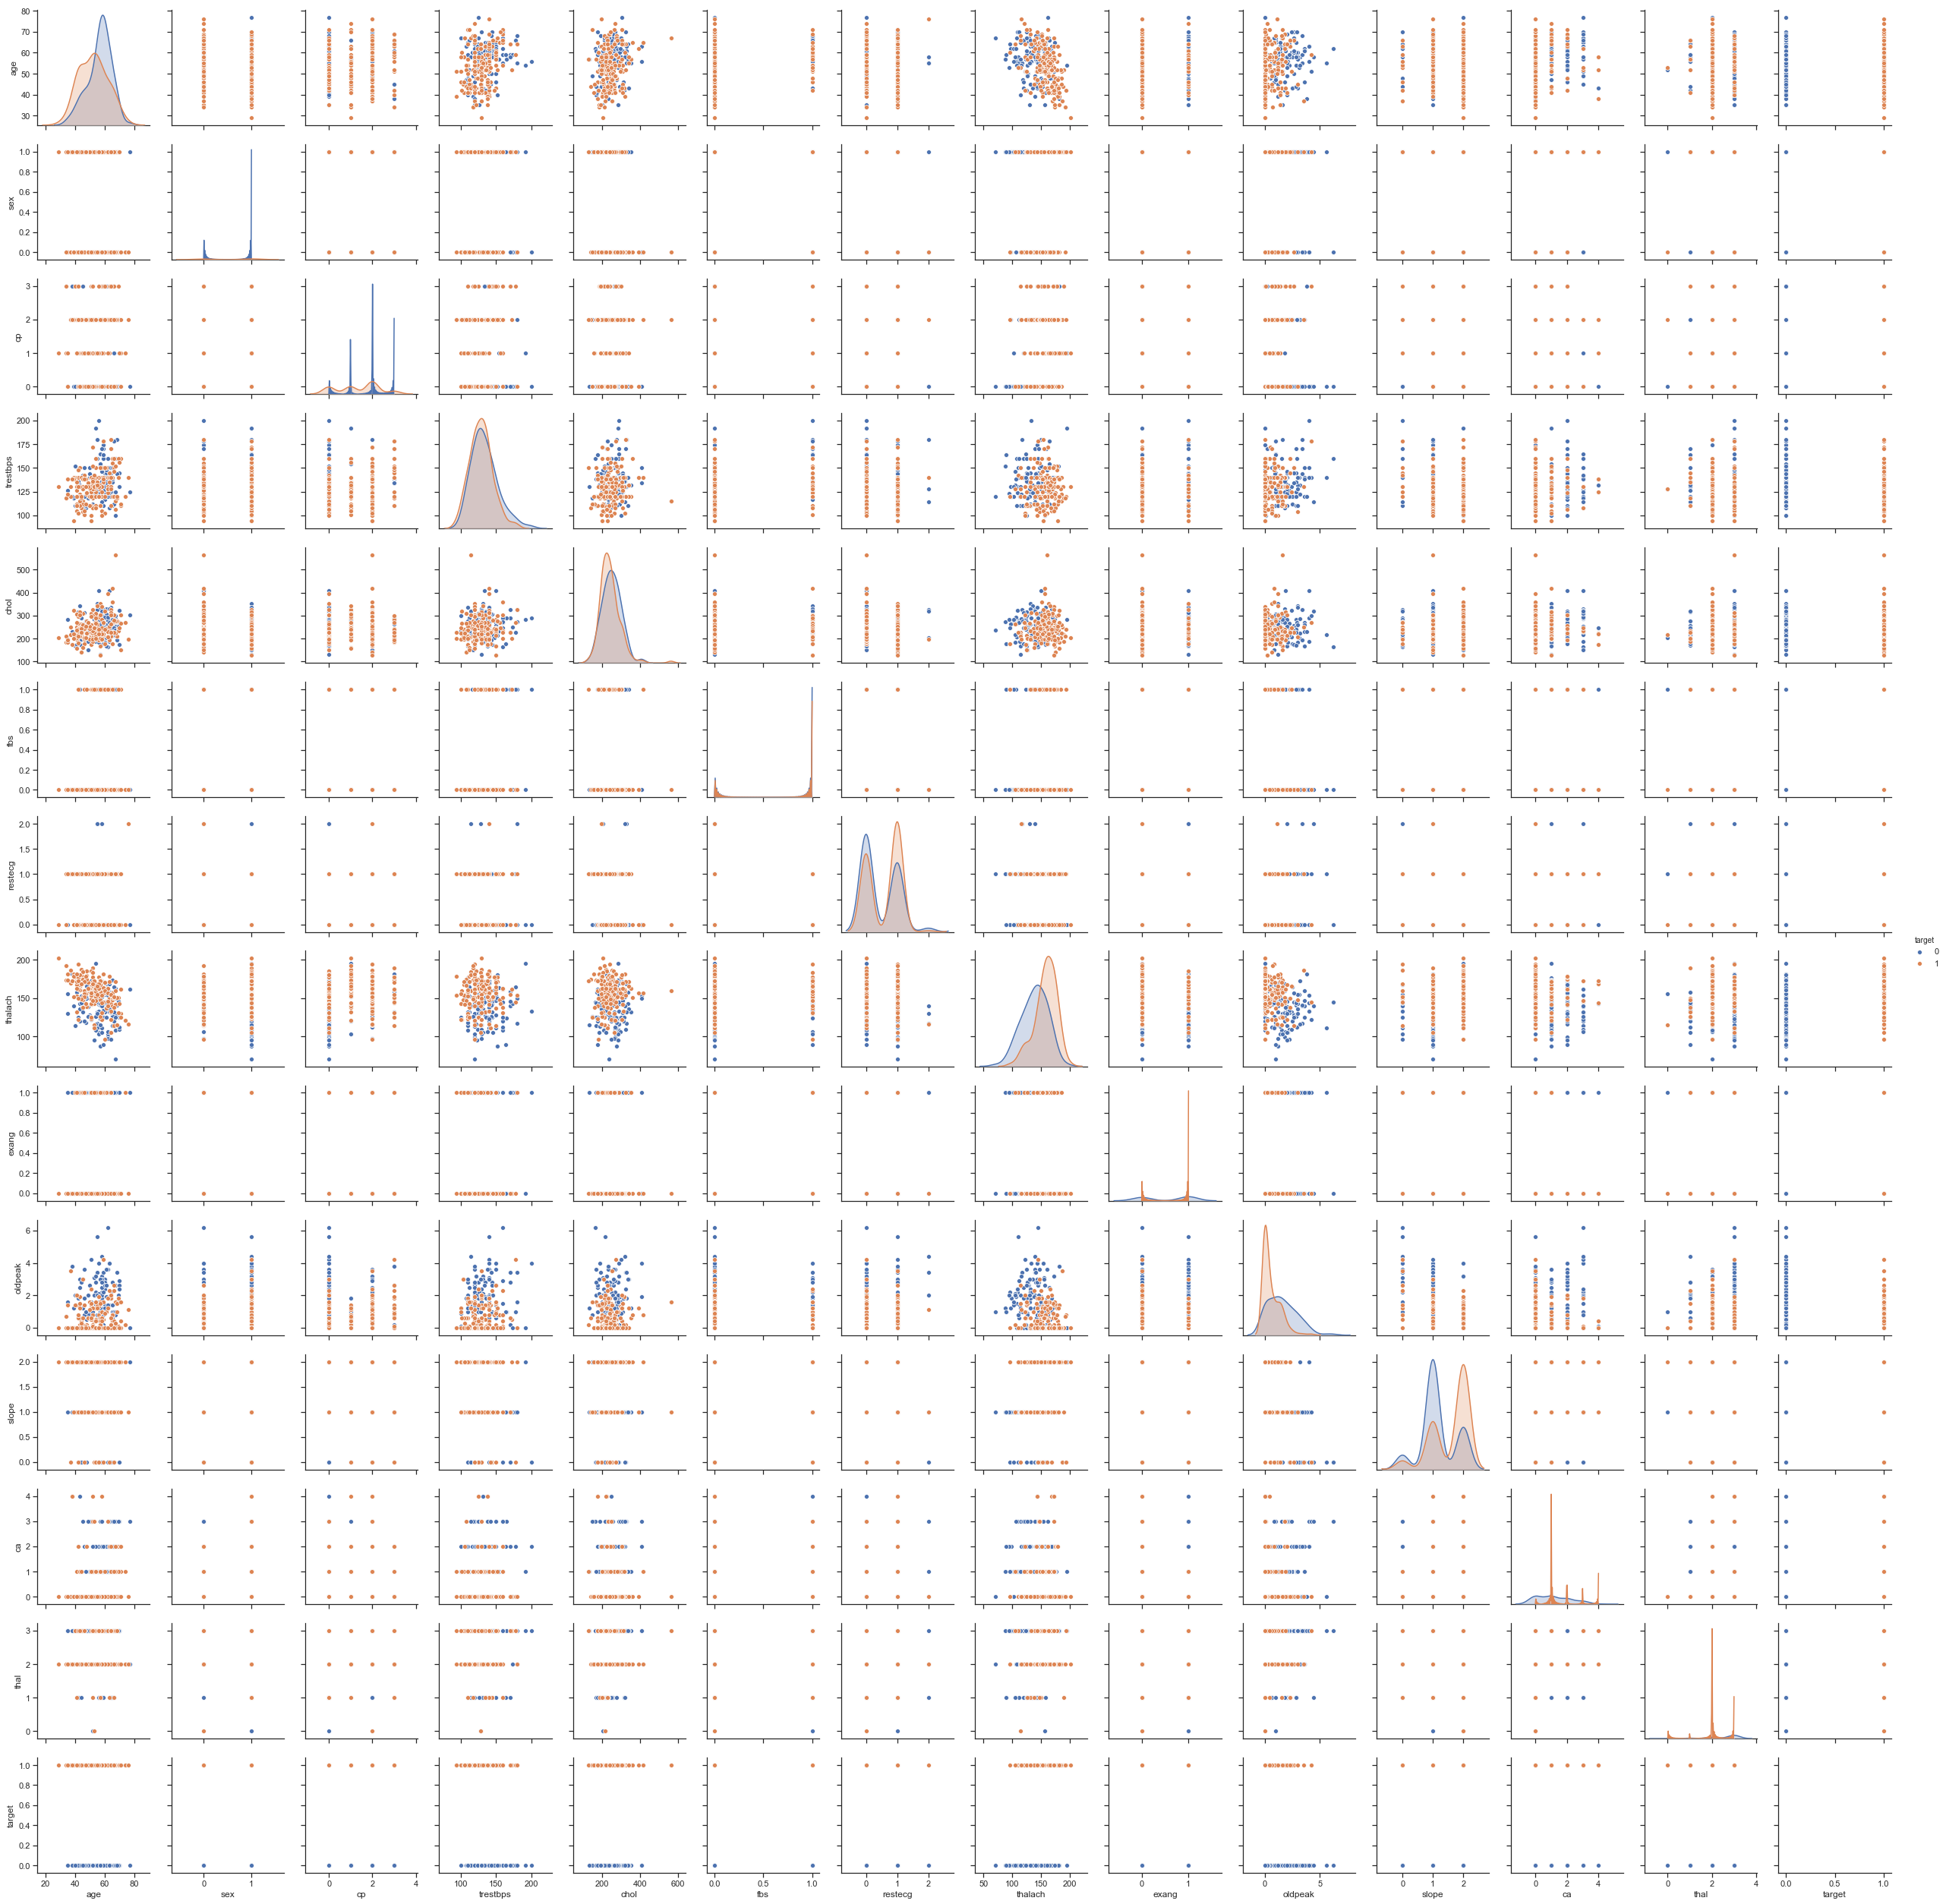

In [60]:
sns.pairplot(data, hue="target")

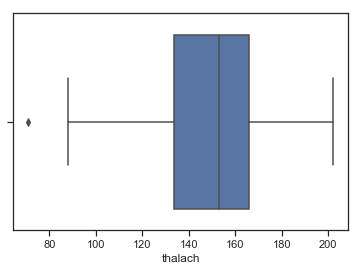

In [61]:
# ящик с усами
sns.boxplot(x=data['thalach'])

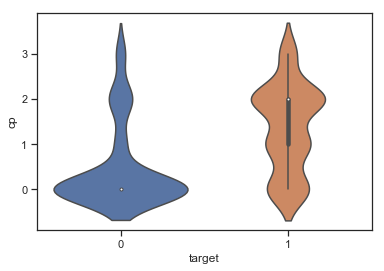

In [63]:
# Распределение параметра cp сгруппированные по target.
sns.violinplot(x='target', y='cp', data=data)

In [64]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


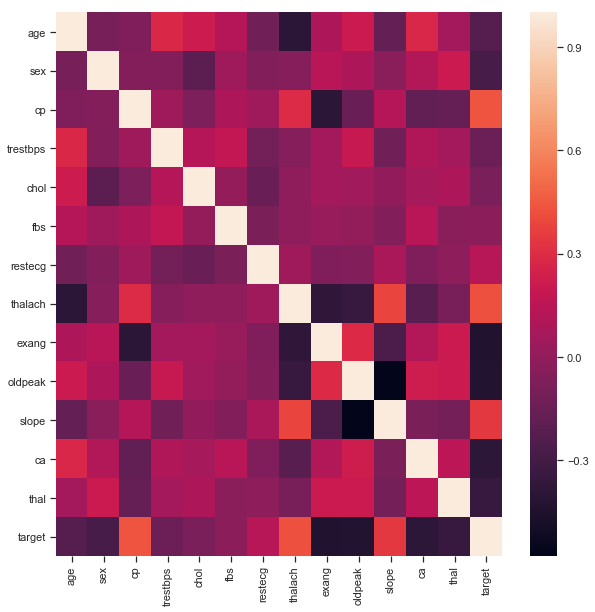

In [73]:
# тепловая карта со значениями в ячейках
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr())

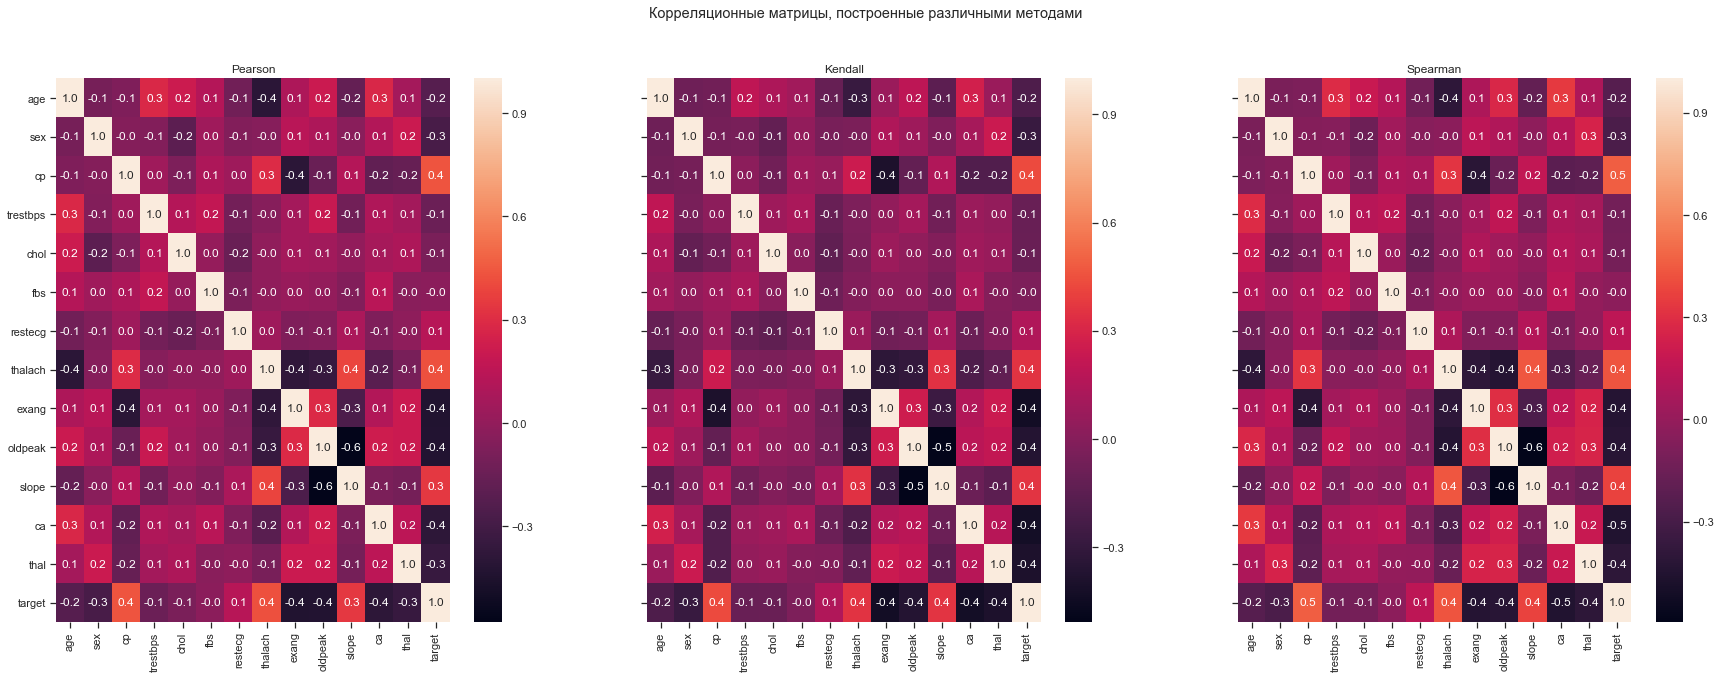

In [78]:

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(30,10))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.1f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.1f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

In [79]:
jupyter nbconvert --to latex --template=../common/template.tplx Research_and_vizualization_of_data.ipynb

SyntaxError: invalid syntax (<ipython-input-79-9adfee7a56fd>, line 1)